# Player Transfermrket Value Estimator 

In [ ]:
!pip install -U scikit-learn

In [ ]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
pd.set_option("display.max_columns", None, "display.max_rows", None)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd gdrive/MyDrive/UT/Plan\ II\ \(General\)/Thesis/Model

[Errno 2] No such file or directory: 'gdrive/MyDrive/UT/Plan II (General)/Thesis/Model'
/content/gdrive/MyDrive/UT/Plan II (General)/Thesis/Model


In [ ]:
raw = pd.read_csv('final_dataset.csv')

all_features = pd.read_csv('all_features.csv')
oneten_features = pd.read_csv('oneten_features.csv')
eighty_features = pd.read_csv('eighty_features.csv')
fifty_features = pd.read_csv('fifty_features.csv')
twenty_features = pd.read_csv('twenty_features.csv')

## Model Testing

### Setup

Will put each of the five data frames through the following models (with minimal tuning - real tuning will come after choosing the best type of model):

*   Multiple (Simple) Linear Regression
*   Lasso Regression
*   Ridge Regression
*   XGBoost Regressor
*   ElasticNet Regression
*   CatBoost Regressor
*   Random Forest Regressor
*   K-Nearest Neighbors

The regression metric used will be the Mean Absolute Percentage Error (MAPE), but, because I have log-transformed the data, it will reflect the log percentage.

Each dataset will be split into train and test sets (test_size being 10% of data). Will train on the 90%, and evaluate the MAPE on the remaining 10%).

In [ ]:
models_list = {'Feature #': ['All_Features', '110_Features', '80_Features', '50_Features', '20_Features']}

results = pd.DataFrame(data = models_list)

linreg = np.zeros(5)
results['LinReg'] = linreg.copy()
results['Lasso'] = linreg.copy()
results['Ridge'] = linreg.copy()
results['XGBoost'] = linreg.copy()
results['ElasticNet'] = linreg.copy()
results['CatBoost'] = linreg.copy()
results['RandomForest'] = linreg.copy()
results['KNN'] = linreg.copy()

results.head()

,Feature #,LinReg,Lasso,Ridge,XGBoost,ElasticNet,CatBoost,RandomForest,KNN
0,All_Features,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,110_Features,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80_Features,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50_Features,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20_Features,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Creating Train-Test Splits

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(all_features.drop(columns=['Log Value']), all_features['Log Value'], random_state = 42, test_size = 0.10)
X_train_oneten, X_test_oneten, y_train_oneten, y_test_oneten = train_test_split(oneten_features.drop(columns=['Log Value']), oneten_features['Log Value'], random_state = 42, test_size = 0.10)
X_train_eighty, X_test_eighty, y_train_eighty, y_test_eighty = train_test_split(eighty_features.drop(columns=['Log Value']), eighty_features['Log Value'], random_state = 42, test_size = 0.10)
X_train_fifty, X_test_fifty, y_train_fifty, y_test_fifty = train_test_split(fifty_features.drop(columns=['Log Value']), fifty_features['Log Value'], random_state = 42, test_size = 0.10)
X_train_twenty, X_test_twenty, y_train_twenty, y_test_twenty = train_test_split(twenty_features.drop(columns=['Log Value']), twenty_features['Log Value'], random_state = 42, test_size = 0.10)

### Multiple (Simple) Linear Regression

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
## All Features - MLR

model.fit(X_train_all, y_train_all)

mape_test = mean_absolute_percentage_error(y_test_all, model.predict(X_test_all))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[0,1] = mape_test*100

Test Data MAPE for All Features: 0.04071761342118302


In [ ]:
## 110 Features - MLR

model.fit(X_train_oneten, y_train_oneten)

mape_test = mean_absolute_percentage_error(y_test_oneten, model.predict(X_test_oneten))

print(f'Test Data MAPE for 110 Features: {mape_test}')
results.iat[1,1] = mape_test*100

Test Data MAPE for 110 Features: 0.041556319585747827


In [ ]:
## 80 Features - MLR

model.fit(X_train_eighty, y_train_eighty)

mape_test = mean_absolute_percentage_error(y_test_eighty, model.predict(X_test_eighty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[2,1] = mape_test*100

Test Data MAPE for All Features: 0.04459518800152061


In [ ]:
## 50 Features - MLR

model.fit(X_train_fifty, y_train_fifty)

mape_test = mean_absolute_percentage_error(y_test_fifty, model.predict(X_test_fifty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[3,1] = mape_test*100

Test Data MAPE for All Features: 0.05152385357174221


In [ ]:
## 20 Features - MLR

model.fit(X_train_twenty, y_train_twenty)

mape_test = mean_absolute_percentage_error(y_test_twenty, model.predict(X_test_twenty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[4,1] = mape_test*100

Test Data MAPE for All Features: 0.05247610356106332


In [ ]:
results

,Feature #,LinReg,Lasso,Ridge,XGBoost,ElasticNet,CatBoost,RandomForest,KNN
0,All_Features,4.071761,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,110_Features,4.155632,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80_Features,4.459519,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50_Features,5.152385,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20_Features,5.247610,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Lasso Regression

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

grid = {'alpha': [0, 0.01, 0.1, 1]}
cv = RepeatedKFold(n_splits = 3, n_repeats = 3, random_state = 42)
model = Lasso()

search = GridSearchCV(model, grid, scoring='neg_mean_absolute_percentage_error', cv=cv, n_jobs =-1)

In [ ]:
## All Features - Lasso

res_all = search.fit(X_train_all, y_train_all)

mape_test = mean_absolute_percentage_error(y_test_all, search.predict(X_test_all))

print(f'Test Data MAPE for All Features: {mape_test} with Hyperparameters: {res_all.best_params_}')
results.iat[0,2] = mape_test*100

Test Data MAPE for All Features: 0.04114437282511117 with Hyperparameters: {'alpha': 0.01}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.441e+02, tolerance: 2.371e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
## 110 Features - Lasso

res_oneten = search.fit(X_train_oneten, y_train_oneten)

mape_test = mean_absolute_percentage_error(y_test_oneten, search.predict(X_test_oneten))

print(f'Test Data MAPE for 110 Features: {mape_test} with Hyperparameters: {res_oneten.best_params_}')
results.iat[1,2] = mape_test*100

Test Data MAPE for 110 Features: 0.04191567673759582 with Hyperparameters: {'alpha': 0.01}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.587e+02, tolerance: 2.371e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
## 80 Features - Lasso

res_eighty = search.fit(X_train_eighty, y_train_eighty)

mape_test = mean_absolute_percentage_error(y_test_eighty, search.predict(X_test_eighty))

print(f'Test Data MAPE for 80 Features: {mape_test} with Hyperparameters: {res_eighty.best_params_}')
results.iat[2,2] = mape_test*100

Test Data MAPE for 80 Features: 0.044110203518787534 with Hyperparameters: {'alpha': 0.01}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.704e+02, tolerance: 2.371e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
## 50 Features - Lasso

res_fifty = search.fit(X_train_fifty, y_train_fifty)

mape_test = mean_absolute_percentage_error(y_test_fifty, search.predict(X_test_fifty))

print(f'Test Data MAPE for 50 Features: {mape_test} with Hyperparameters: {res_fifty.best_params_}')
results.iat[3,2] = mape_test*100

Test Data MAPE for 50 Features: 0.051730335104887136 with Hyperparameters: {'alpha': 0.1}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.245e+02, tolerance: 2.371e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
## 20 Features - Lasso

res_twenty = search.fit(X_train_twenty, y_train_twenty)

mape_test = mean_absolute_percentage_error(y_test_twenty, search.predict(X_test_twenty))

print(f'Test Data MAPE for 20 Features: {mape_test} with Hyperparameters: {res_twenty.best_params_}')
results.iat[4,2] = mape_test*100

Test Data MAPE for 20 Features: 0.052518261254627156 with Hyperparameters: {'alpha': 0.01}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.181e+02, tolerance: 2.371e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


### Ride Regression

In [ ]:
from sklearn.linear_model import Ridge

grid = {'alpha': np.arange(0, 1, 0.05)}
cv = RepeatedKFold(n_splits = 3, n_repeats = 3, random_state = 42)
model = Ridge()

search = GridSearchCV(model, grid, scoring='neg_mean_absolute_percentage_error', cv=cv, n_jobs =-1)

In [ ]:
## All Features - Ridge

res_all = search.fit(X_train_all, y_train_all)

mape_test = mean_absolute_percentage_error(y_test_all, search.predict(X_test_all))

print(f'Test Data MAPE for All Features: {mape_test} with Hyperparameters: {res_all.best_params_}')
results.iat[0,3] = mape_test*100

Test Data MAPE for All Features: 0.04095197223845263 with Hyperparameters: {'alpha': 0.9500000000000001}


In [ ]:
## 110 Features - Ridge

res_oneten = search.fit(X_train_oneten, y_train_oneten)

mape_test = mean_absolute_percentage_error(y_test_oneten, search.predict(X_test_oneten))

print(f'Test Data MAPE for 110 Features: {mape_test} with Hyperparameters: {res_oneten.best_params_}')
results.iat[1,3] = mape_test*100

Test Data MAPE for 110 Features: 0.04160111860646251 with Hyperparameters: {'alpha': 0.9500000000000001}


In [ ]:
## 80 Features - Ridge

res_eighty = search.fit(X_train_eighty, y_train_eighty)

mape_test = mean_absolute_percentage_error(y_test_eighty, search.predict(X_test_eighty))

print(f'Test Data MAPE for 80 Features: {mape_test} with Hyperparameters: {res_eighty.best_params_}')
results.iat[2,3] = mape_test*100

Test Data MAPE for 80 Features: 0.04446740109942147 with Hyperparameters: {'alpha': 0.9500000000000001}


In [ ]:
## 50 Features - Ridge

res_fifty = search.fit(X_train_fifty, y_train_fifty)

mape_test = mean_absolute_percentage_error(y_test_fifty, search.predict(X_test_fifty))

print(f'Test Data MAPE for 50 Features: {mape_test} with Hyperparameters: {res_fifty.best_params_}')
results.iat[3,3] = mape_test*100

Test Data MAPE for 50 Features: 0.05152672372238831 with Hyperparameters: {'alpha': 0.9500000000000001}


In [ ]:
## 20 Features - Ridge

res_twenty = search.fit(X_train_twenty, y_train_twenty)

mape_test = mean_absolute_percentage_error(y_test_twenty, search.predict(X_test_twenty))

print(f'Test Data MAPE for 20 Features: {mape_test} with Hyperparameters: {res_twenty.best_params_}')
results.iat[4,3] = mape_test*100

Test Data MAPE for 20 Features: 0.052476212265423476 with Hyperparameters: {'alpha': 0.9500000000000001}


### XGBoost

In [ ]:
import xgboost
from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror')

In [ ]:
## All Features - XGBoost

model.fit(X_train_all, y_train_all)

mape_test = mean_absolute_percentage_error(y_test_all, model.predict(X_test_all))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[0,4] = mape_test*100

Test Data MAPE for All Features: 0.03871421760904946


In [ ]:
## 110 Features - XGBoost

model.fit(X_train_oneten, y_train_oneten)

mape_test = mean_absolute_percentage_error(y_test_oneten, model.predict(X_test_oneten))

print(f'Test Data MAPE for 110 Features: {mape_test}')
results.iat[1,4] = mape_test*100

Test Data MAPE for 110 Features: 0.038637651826859944


In [ ]:
## 80 Features - XGBoost

model.fit(X_train_eighty, y_train_eighty)

mape_test = mean_absolute_percentage_error(y_test_eighty, model.predict(X_test_eighty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[2,4] = mape_test*100

Test Data MAPE for All Features: 0.04085825290664386


In [ ]:
## 50 Features - XGBoost

model.fit(X_train_fifty, y_train_fifty)

mape_test = mean_absolute_percentage_error(y_test_fifty, model.predict(X_test_fifty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[3,4] = mape_test*100

Test Data MAPE for All Features: 0.05215210812978305


In [ ]:
## 20 Features - XGBoost

model.fit(X_train_twenty, y_train_twenty)

mape_test = mean_absolute_percentage_error(y_test_twenty, model.predict(X_test_twenty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[4,4] = mape_test*100

Test Data MAPE for All Features: 0.054129053993013314


### ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

grid = {'alpha': np.arange(0, 1, 0.2), 
        'l1_ratio': np.arange(0, 1, 0.5)}
cv = RepeatedKFold(n_splits = 3, n_repeats = 3, random_state = 42)
model = ElasticNet()

search = GridSearchCV(model, grid, scoring='neg_mean_absolute_percentage_error', cv=cv, n_jobs =-1)

In [ ]:
## All Features - ElasticNet

res_all = search.fit(X_train_all, y_train_all)

mape_test = mean_absolute_percentage_error(y_test_all, search.predict(X_test_all))

print(f'Test Data MAPE for All Features: {mape_test} with Hyperparameters: {res_all.best_params_}')
results.iat[0,5] = mape_test*100

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.075e+02, tolerance: 2.371e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

Test Data MAPE for All Features: 0.040967498963343625 with Hyperparameters: {'alpha': 0.0, 'l1_ratio': 0.0}


In [ ]:
## 110 Features - ElasticNet

res_oneten = search.fit(X_train_oneten, y_train_oneten)

mape_test = mean_absolute_percentage_error(y_test_oneten, search.predict(X_test_oneten))

print(f'Test Data MAPE for 110 Features: {mape_test} with Hyperparameters: {res_oneten.best_params_}')
results.iat[1,5] = mape_test*100

Test Data MAPE for 110 Features: 0.04163046563068711 with Hyperparameters: {'alpha': 0.0, 'l1_ratio': 0.0}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.306e+02, tolerance: 2.371e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

In [ ]:
## 80 Features - ElasticNet

res_eighty = search.fit(X_train_eighty, y_train_eighty)

mape_test = mean_absolute_percentage_error(y_test_eighty, search.predict(X_test_eighty))

print(f'Test Data MAPE for 80 Features: {mape_test} with Hyperparameters: {res_eighty.best_params_}')
results.iat[2,5] = mape_test*100

Test Data MAPE for 80 Features: 0.04466664555520951 with Hyperparameters: {'alpha': 0.0, 'l1_ratio': 0.0}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.522e+02, tolerance: 2.371e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

In [ ]:
## 50 Features - ElasticNet

res_fifty = search.fit(X_train_fifty, y_train_fifty)

mape_test = mean_absolute_percentage_error(y_test_fifty, search.predict(X_test_fifty))

print(f'Test Data MAPE for 50 Features: {mape_test} with Hyperparameters: {res_fifty.best_params_}')
results.iat[3,5] = mape_test*100

Test Data MAPE for 50 Features: 0.05164716272199233 with Hyperparameters: {'alpha': 0.8, 'l1_ratio': 0.0}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.415e+02, tolerance: 2.371e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
## 20 Features - ElasticNet

res_twenty = search.fit(X_train_twenty, y_train_twenty)

mape_test = mean_absolute_percentage_error(y_test_twenty, search.predict(X_test_twenty))

print(f'Test Data MAPE for 20 Features: {mape_test} with Hyperparameters: {res_twenty.best_params_}')
results.iat[4,5] = mape_test*100

Test Data MAPE for 20 Features: 0.05250203636672136 with Hyperparameters: {'alpha': 0.8, 'l1_ratio': 0.0}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.898e+02, tolerance: 2.371e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
results

,Feature #,LinReg,Lasso,Ridge,XGBoost,ElasticNet,CatBoost,RandomForest,KNN
0,All_Features,4.071761,4.114437,4.095197,3.871422,4.096750,0.0,0.0,0.0
1,110_Features,4.155632,4.191568,4.160112,3.863765,4.163047,0.0,0.0,0.0
2,80_Features,4.459519,4.411020,4.446740,4.085825,4.466665,0.0,0.0,0.0
3,50_Features,5.152385,5.173034,5.152672,5.215211,5.164716,0.0,0.0,0.0
4,20_Features,5.247610,5.251826,5.247621,5.412905,5.250204,0.0,0.0,0.0


### CatBoost 

In [ ]:
pip install catboost

In [ ]:
import catboost
from catboost import CatBoostRegressor

model = CatBoostRegressor(loss_function = 'MAPE')

In [ ]:
## All Features - CatBoost

model.fit(X_train_all, y_train_all)

mape_test = mean_absolute_percentage_error(y_test_all, model.predict(X_test_all))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[0,6] = mape_test*100

0:	learn: 0.0645056	total: 71.6ms	remaining: 1m 11s
1:	learn: 0.0638743	total: 91.5ms	remaining: 45.7s
2:	learn: 0.0632163	total: 112ms	remaining: 37.1s
3:	learn: 0.0625282	total: 131ms	remaining: 32.6s
4:	learn: 0.0618456	total: 150ms	remaining: 29.9s
5:	learn: 0.0612425	total: 169ms	remaining: 28s
6:	learn: 0.0606394	total: 188ms	remaining: 26.7s
7:	learn: 0.0600368	total: 216ms	remaining: 26.8s
8:	learn: 0.0593111	total: 239ms	remaining: 26.3s
9:	learn: 0.0587717	total: 261ms	remaining: 25.8s
10:	learn: 0.0581694	total: 288ms	remaining: 25.9s
11:	learn: 0.0577623	total: 308ms	remaining: 25.4s
12:	learn: 0.0572127	total: 332ms	remaining: 25.2s
13:	learn: 0.0567302	total: 353ms	remaining: 24.9s
14:	learn: 0.0563028	total: 373ms	remaining: 24.5s
15:	learn: 0.0558118	total: 394ms	remaining: 24.2s
16:	learn: 0.0554035	total: 417ms	remaining: 24.1s
17:	learn: 0.0549368	total: 437ms	remaining: 23.8s
18:	learn: 0.0543906	total: 456ms	remaining: 23.6s
19:	learn: 0.0538777	total: 476ms	remain

In [ ]:
## 110 Features - CatBoost

model.fit(X_train_oneten, y_train_oneten)

mape_test = mean_absolute_percentage_error(y_test_oneten, model.predict(X_test_oneten))

print(f'Test Data MAPE for 110 Features: {mape_test}')
results.iat[1,6] = mape_test*100

0:	learn: 0.0643217	total: 25.6ms	remaining: 25.6s
1:	learn: 0.0636671	total: 41.8ms	remaining: 20.9s
2:	learn: 0.0629901	total: 61.9ms	remaining: 20.6s
3:	learn: 0.0623105	total: 78.6ms	remaining: 19.6s
4:	learn: 0.0616138	total: 95ms	remaining: 18.9s
5:	learn: 0.0610608	total: 112ms	remaining: 18.5s
6:	learn: 0.0604583	total: 134ms	remaining: 19s
7:	learn: 0.0597866	total: 159ms	remaining: 19.7s
8:	learn: 0.0592935	total: 175ms	remaining: 19.3s
9:	learn: 0.0586647	total: 192ms	remaining: 19s
10:	learn: 0.0580921	total: 208ms	remaining: 18.7s
11:	learn: 0.0576193	total: 229ms	remaining: 18.8s
12:	learn: 0.0571293	total: 245ms	remaining: 18.6s
13:	learn: 0.0566676	total: 268ms	remaining: 18.9s
14:	learn: 0.0561353	total: 285ms	remaining: 18.7s
15:	learn: 0.0556519	total: 310ms	remaining: 19.1s
16:	learn: 0.0552353	total: 331ms	remaining: 19.1s
17:	learn: 0.0548256	total: 353ms	remaining: 19.3s
18:	learn: 0.0543282	total: 370ms	remaining: 19.1s
19:	learn: 0.0537671	total: 387ms	remainin

In [ ]:
## 80 Features - CatBoost

model.fit(X_train_eighty, y_train_eighty)

mape_test = mean_absolute_percentage_error(y_test_eighty, model.predict(X_test_eighty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[2,6] = mape_test*100

0:	learn: 0.0645538	total: 17.5ms	remaining: 17.5s
1:	learn: 0.0637981	total: 30.3ms	remaining: 15.1s
2:	learn: 0.0631361	total: 43ms	remaining: 14.3s
3:	learn: 0.0624726	total: 63.4ms	remaining: 15.8s
4:	learn: 0.0618679	total: 86.2ms	remaining: 17.1s
5:	learn: 0.0612282	total: 99.5ms	remaining: 16.5s
6:	learn: 0.0605671	total: 113ms	remaining: 16s
7:	learn: 0.0599670	total: 127ms	remaining: 15.8s
8:	learn: 0.0594265	total: 149ms	remaining: 16.4s
9:	learn: 0.0589626	total: 162ms	remaining: 16.1s
10:	learn: 0.0584068	total: 176ms	remaining: 15.8s
11:	learn: 0.0577711	total: 189ms	remaining: 15.6s
12:	learn: 0.0571496	total: 206ms	remaining: 15.7s
13:	learn: 0.0567338	total: 219ms	remaining: 15.5s
14:	learn: 0.0562013	total: 232ms	remaining: 15.3s
15:	learn: 0.0556889	total: 248ms	remaining: 15.3s
16:	learn: 0.0552415	total: 261ms	remaining: 15.1s
17:	learn: 0.0546783	total: 278ms	remaining: 15.2s
18:	learn: 0.0541947	total: 291ms	remaining: 15s
19:	learn: 0.0536777	total: 304ms	remaini

In [ ]:
## 50 Features - CatBoost

model.fit(X_train_fifty, y_train_fifty)

mape_test = mean_absolute_percentage_error(y_test_fifty, model.predict(X_test_fifty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[3,6] = mape_test*100

0:	learn: 0.0645516	total: 11.1ms	remaining: 11.1s
1:	learn: 0.0640374	total: 20ms	remaining: 9.98s
2:	learn: 0.0635575	total: 29.1ms	remaining: 9.67s
3:	learn: 0.0630906	total: 37.9ms	remaining: 9.44s
4:	learn: 0.0626166	total: 46.6ms	remaining: 9.28s
5:	learn: 0.0621448	total: 57.7ms	remaining: 9.56s
6:	learn: 0.0617017	total: 67.4ms	remaining: 9.56s
7:	learn: 0.0613091	total: 76.3ms	remaining: 9.46s
8:	learn: 0.0609005	total: 85.6ms	remaining: 9.42s
9:	learn: 0.0604669	total: 97.2ms	remaining: 9.63s
10:	learn: 0.0600917	total: 118ms	remaining: 10.6s
11:	learn: 0.0597178	total: 128ms	remaining: 10.5s
12:	learn: 0.0593068	total: 142ms	remaining: 10.8s
13:	learn: 0.0589314	total: 151ms	remaining: 10.6s
14:	learn: 0.0585827	total: 160ms	remaining: 10.5s
15:	learn: 0.0582220	total: 170ms	remaining: 10.4s
16:	learn: 0.0578838	total: 181ms	remaining: 10.4s
17:	learn: 0.0575684	total: 190ms	remaining: 10.3s
18:	learn: 0.0572614	total: 208ms	remaining: 10.7s
19:	learn: 0.0569886	total: 218ms

In [ ]:
## 20 Features - CatBoost

model.fit(X_train_twenty, y_train_twenty)

mape_test = mean_absolute_percentage_error(y_test_twenty, model.predict(X_test_twenty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[4,6] = mape_test*100

0:	learn: 0.0646085	total: 5.4ms	remaining: 5.39s
1:	learn: 0.0641293	total: 12.9ms	remaining: 6.44s
2:	learn: 0.0636671	total: 20.6ms	remaining: 6.83s
3:	learn: 0.0631667	total: 25.3ms	remaining: 6.31s
4:	learn: 0.0626727	total: 29.9ms	remaining: 5.94s
5:	learn: 0.0621740	total: 34.2ms	remaining: 5.66s
6:	learn: 0.0616845	total: 38.7ms	remaining: 5.5s
7:	learn: 0.0612529	total: 43.2ms	remaining: 5.36s
8:	learn: 0.0607690	total: 47.8ms	remaining: 5.26s
9:	learn: 0.0603427	total: 55.7ms	remaining: 5.52s
10:	learn: 0.0599405	total: 60.2ms	remaining: 5.42s
11:	learn: 0.0596032	total: 64.8ms	remaining: 5.34s
12:	learn: 0.0592799	total: 69.6ms	remaining: 5.29s
13:	learn: 0.0589305	total: 74ms	remaining: 5.21s
14:	learn: 0.0586235	total: 78.7ms	remaining: 5.17s
15:	learn: 0.0583332	total: 83.1ms	remaining: 5.11s
16:	learn: 0.0580080	total: 87.5ms	remaining: 5.06s
17:	learn: 0.0576830	total: 92.1ms	remaining: 5.03s
18:	learn: 0.0574205	total: 96.5ms	remaining: 4.98s
19:	learn: 0.0571300	total

In [ ]:
results

,Feature #,LinReg,Lasso,Ridge,XGBoost,ElasticNet,CatBoost,RandomForest,KNN
0,All_Features,4.071761,4.114437,4.095197,3.871422,4.096750,3.809443,0.0,0.0
1,110_Features,4.155632,4.191568,4.160112,3.863765,4.163047,3.757891,0.0,0.0
2,80_Features,4.459519,4.411020,4.446740,4.085825,4.466665,3.977971,0.0,0.0
3,50_Features,5.152385,5.173034,5.152672,5.215211,5.164716,5.186047,0.0,0.0
4,20_Features,5.247610,5.251826,5.247621,5.412905,5.250204,5.459794,0.0,0.0


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 42, criterion='absolute_error')

In [ ]:
## All Features - Random Forest

model.fit(X_train_all, y_train_all)

mape_test = mean_absolute_percentage_error(y_test_all, model.predict(X_test_all))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[0,7] = mape_test*100

Test Data MAPE for All Features: 0.04116834175159362


In [ ]:
## 110 Features - Random Forest

model.fit(X_train_oneten, y_train_oneten)

mape_test = mean_absolute_percentage_error(y_test_oneten, model.predict(X_test_oneten))

print(f'Test Data MAPE for 110 Features: {mape_test}')
results.iat[1,7] = mape_test*100

Test Data MAPE for 110 Features: 0.04154399406400378


In [ ]:
## 80 Features - Random Forest

model.fit(X_train_eighty, y_train_eighty)

mape_test = mean_absolute_percentage_error(y_test_eighty, model.predict(X_test_eighty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[2,7] = mape_test*100

Test Data MAPE for All Features: 0.04320470954661972


In [ ]:
## 50 Features - Random Forest

model.fit(X_train_fifty, y_train_fifty)

mape_test = mean_absolute_percentage_error(y_test_fifty, model.predict(X_test_fifty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[3,7] = mape_test*100

Test Data MAPE for All Features: 0.0542940486346582


In [ ]:
## 20 Features - Random Forest

model.fit(X_train_twenty, y_train_twenty)

mape_test = mean_absolute_percentage_error(y_test_twenty, model.predict(X_test_twenty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[4,7] = mape_test*100

Test Data MAPE for All Features: 0.05538766514983429


In [ ]:
results

,Feature #,LinReg,Lasso,Ridge,XGBoost,ElasticNet,CatBoost,RandomForest,KNN
0,All_Features,4.071761,4.114437,4.095197,3.871422,4.096750,3.809443,4.116834,0.0
1,110_Features,4.155632,4.191568,4.160112,3.863765,4.163047,3.757891,4.154399,0.0
2,80_Features,4.459519,4.411020,4.446740,4.085825,4.466665,3.977971,4.320471,0.0
3,50_Features,5.152385,5.173034,5.152672,5.215211,5.164716,5.186047,5.429405,0.0
4,20_Features,5.247610,5.251826,5.247621,5.412905,5.250204,5.459794,5.538767,0.0


### K-Nearest Neighbors




In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()

In [ ]:
## All Features - KNN

model.fit(X_train_all, y_train_all)

mape_test = mean_absolute_percentage_error(y_test_all, model.predict(X_test_all))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[0,8] = mape_test*100

Test Data MAPE for All Features: 0.05311157995061201


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
## 110 Features - KNN

model.fit(X_train_oneten, y_train_oneten)

mape_test = mean_absolute_percentage_error(y_test_oneten, model.predict(X_test_oneten))

print(f'Test Data MAPE for 110 Features: {mape_test}')
results.iat[1,8] = mape_test*100

Test Data MAPE for 110 Features: 0.05294201999368592


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
## 80 Features - KNN

model.fit(X_train_eighty, y_train_eighty)

mape_test = mean_absolute_percentage_error(y_test_eighty, model.predict(X_test_eighty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[2,8] = mape_test*100

Test Data MAPE for All Features: 0.054369713469161626


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
## 50 Features - KNN

model.fit(X_train_fifty, y_train_fifty)

mape_test = mean_absolute_percentage_error(y_test_fifty, model.predict(X_test_fifty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[3,8] = mape_test*100

Test Data MAPE for All Features: 0.054610285950639145


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
## 20 Features - KNN

model.fit(X_train_twenty, y_train_twenty)

mape_test = mean_absolute_percentage_error(y_test_twenty, model.predict(X_test_twenty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[4,8] = mape_test*100

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


Test Data MAPE for All Features: 0.0599973536870007


In [ ]:
results

,Feature #,LinReg,Lasso,Ridge,XGBoost,ElasticNet,CatBoost,RandomForest,KNN
0,All_Features,4.071761,4.114437,4.095197,3.871422,4.096750,3.809443,4.116834,5.311158
1,110_Features,4.155632,4.191568,4.160112,3.863765,4.163047,3.757891,4.154399,5.294202
2,80_Features,4.459519,4.411020,4.446740,4.085825,4.466665,3.977971,4.320471,5.436971
3,50_Features,5.152385,5.173034,5.152672,5.215211,5.164716,5.186047,5.429405,5.461029
4,20_Features,5.247610,5.251826,5.247621,5.412905,5.250204,5.459794,5.538767,5.999735


### Conclusion of Model Selection

In [ ]:
display(results)

,Features #,LinReg,Lasso,Ridge,XGBoost,ElasticNet,CatBoost,RandomForest,KNN
0,143,4.071761,4.114437,4.095197,3.871422,4.096750,3.809443,4.116834,5.311158
1,110,4.155632,4.191568,4.160112,3.863765,4.163047,3.757891,4.154399,5.294202
2,80,4.459519,4.411020,4.446740,4.085825,4.466665,3.977971,4.320471,5.436971
3,50,5.152385,5.173034,5.152672,5.215211,5.164716,5.186047,5.429405,5.461029
4,20,5.247610,5.251826,5.247621,5.412905,5.250204,5.459794,5.538767,5.999735


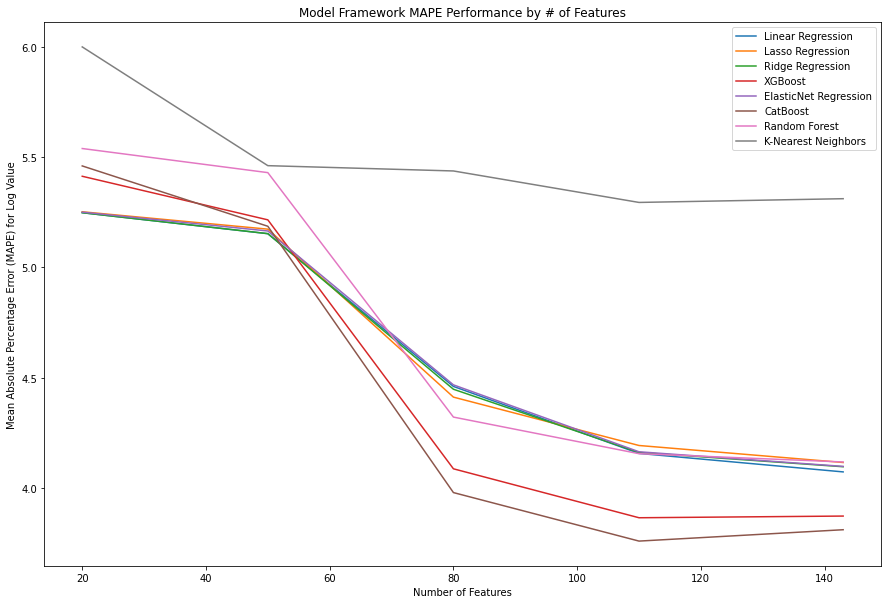

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(results['Features #'], results['LinReg'], label='Linear Regression')
plt.plot(results['Features #'], results['Lasso'], label='Lasso Regression')
plt.plot(results['Features #'], results['Ridge'], label='Ridge Regression')
plt.plot(results['Features #'], results['XGBoost'], label='XGBoost')
plt.plot(results['Features #'], results['ElasticNet'], label='ElasticNet Regression')
plt.plot(results['Features #'], results['CatBoost'], label='CatBoost')
plt.plot(results['Features #'], results['RandomForest'], label='Random Forest')
plt.plot(results['Features #'], results['KNN'], label='K-Nearest Neighbors')
plt.xlabel('Number of Features')
plt.ylabel('Mean Absolute Percentage Error (MAPE) for Log Value')
plt.title('Model Framework MAPE Performance by # of Features')
plt.legend()

CatBoost seems to work the best, and on the 110 feature set. This indicates that there is some best value for feature #s. Going to try some more #s of features between All and 110 for CatBoost to determine the best data set.

## Further Feature Selection

### Features

Going to compare results for CatBoost for features counts:

 All, 130, 125, 120, 115, and 110.

*   All
*   130
*   125
*   120
*   115
*   110

All and 110 are already calculated

In [ ]:
# 130 Feats

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

select_onethirty = SelectKBest(score_func=f_regression, k = 130)
onethirty = select_onethirty.fit_transform(all_features.drop(columns=['Log Value']), all_features['Log Value'])

filter = select_onethirty.get_support()
feats = np.array(all_features.drop(columns=['Log Value']).columns)

#print(f'Selected best 130 features: {feats[filter]}')

onethirty_features = all_features.copy()
onethirty_features.drop(onethirty_features.columns.difference(feats[filter]), 1, inplace=True)
onethirty_features['Log Value'] = all_features['Log Value'].copy()

In [ ]:
# 125 Feats

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

select_onetwofive = SelectKBest(score_func=f_regression, k = 125)
onetwofive = select_onetwofive.fit_transform(all_features.drop(columns=['Log Value']), all_features['Log Value'])

filter = select_onetwofive.get_support()
feats = np.array(all_features.drop(columns=['Log Value']).columns)

#print(f'Selected best 125 features: {feats[filter]}')

onetwofive_features = all_features.copy()
onetwofive_features.drop(onetwofive_features.columns.difference(feats[filter]), 1, inplace=True)
onetwofive_features['Log Value'] = all_features['Log Value'].copy()

In [ ]:
# 120 Feats

select_onetwenty = SelectKBest(score_func=f_regression, k = 120)
onetwenty = select_onetwenty.fit_transform(all_features.drop(columns=['Log Value']), all_features['Log Value'])

filter = select_onetwenty.get_support()
feats = np.array(all_features.drop(columns=['Log Value']).columns)

#print(f'Selected best 120 features: {feats[filter]}')

onetwenty_features = all_features.copy()
onetwenty_features.drop(onetwenty_features.columns.difference(feats[filter]), 1, inplace=True)
onetwenty_features['Log Value'] = all_features['Log Value'].copy()

In [ ]:
# 115 Feats

select_onefifteen = SelectKBest(score_func=f_regression, k = 115)
onefifteen = select_onefifteen.fit_transform(all_features.drop(columns=['Log Value']), all_features['Log Value'])

filter = select_onefifteen.get_support()
feats = np.array(all_features.drop(columns=['Log Value']).columns)

#print(f'Selected best 115 features: {feats[filter]}')

onefifteen_features = all_features.copy()
onefifteen_features.drop(onefifteen_features.columns.difference(feats[filter]), 1, inplace=True)
onefifteen_features['Log Value'] = all_features['Log Value'].copy()

### Model Testing pt 2

Going to repeat the process as before, but only for CatBoost

In [ ]:
X_train_onethirty, X_test_onethirty, y_train_onethirty, y_test_onethirty = train_test_split(onethirty_features.drop(columns=['Log Value']), onethirty_features['Log Value'], random_state = 42, test_size = 0.10)
X_train_onetwofive, X_test_onetwofive, y_train_onetwofive, y_test_onetwofive = train_test_split(onetwofive_features.drop(columns=['Log Value']), onetwofive_features['Log Value'], random_state = 42, test_size = 0.10)
X_train_onetwenty, X_test_onetwenty, y_train_onetwenty, y_test_onetwenty = train_test_split(onetwenty_features.drop(columns=['Log Value']), onetwenty_features['Log Value'], random_state = 42, test_size = 0.10)
X_train_onefifteen, X_test_onefifteen, y_train_onefifteen, y_test_onefifteen = train_test_split(onefifteen_features.drop(columns=['Log Value']), onefifteen_features['Log Value'], random_state = 42, test_size = 0.10)

In [ ]:
models_list = {'Feature #': ['All_Features', '130_Features', '125_Features','120_Features', '115_Features', '110_Features']}

results_two = pd.DataFrame(data = models_list)

linreg = np.zeros(6)
results_two['CatBoost'] = linreg.copy()

results_two.iat[0, 1] = results.iloc[0, 6]
results_two.iat[5, 1] = results.iloc[1, 6]

display(results_two)

,Feature #,CatBoost
0,All_Features,3.809443
1,130_Features,0.000000
2,125_Features,0.000000
3,120_Features,0.000000
4,115_Features,0.000000
5,110_Features,3.757891


In [ ]:
import catboost
from catboost import CatBoostRegressor

model = CatBoostRegressor(loss_function = 'MAPE')

In [ ]:
## 130 Features - CatBoost

model.fit(X_train_onethirty, y_train_onethirty)

mape_test = mean_absolute_percentage_error(y_test_onethirty, model.predict(X_test_onethirty))

print(f'Test Data MAPE for 130 Features: {mape_test}')
results_two.iat[1,1] = mape_test*100

In [ ]:
## 125 Features - CatBoost

model.fit(X_train_onetwofive, y_train_onetwofive)

mape_test = mean_absolute_percentage_error(y_test_onetwofive, model.predict(X_test_onetwofive))

print(f'Test Data MAPE for 125 Features: {mape_test}')
results_two.iat[2,1] = mape_test*100

In [ ]:
## 120 Features - CatBoost

model.fit(X_train_onetwenty, y_train_onetwenty)

mape_test = mean_absolute_percentage_error(y_test_onetwenty, model.predict(X_test_onetwenty))

print(f'Test Data MAPE for 120 Features: {mape_test}')
results_two.iat[3,1] = mape_test*100

In [ ]:
## 115 Features - CatBoost

model.fit(X_train_onefifteen, y_train_onefifteen)

mape_test = mean_absolute_percentage_error(y_test_onefifteen, model.predict(X_test_onefifteen))

print(f'Test Data MAPE for 115 Features: {mape_test}')
results_two.iat[4,1] = mape_test*100

In [ ]:
results_two

,Feature #,CatBoost
0,All_Features,3.809443
1,130_Features,3.718238
2,125_Features,3.724278
3,120_Features,3.878299
4,115_Features,3.758328
5,110_Features,3.757891


### Conclusion

The results show the best feature # with a non-tuned CatBoost is 130 (barely). As a result, I am going to continue with a CatBoostRegression with 130 features.

In [ ]:
onethirty_features.to_csv('onethirty_features.csv', encoding='utf-8', index=False)